Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

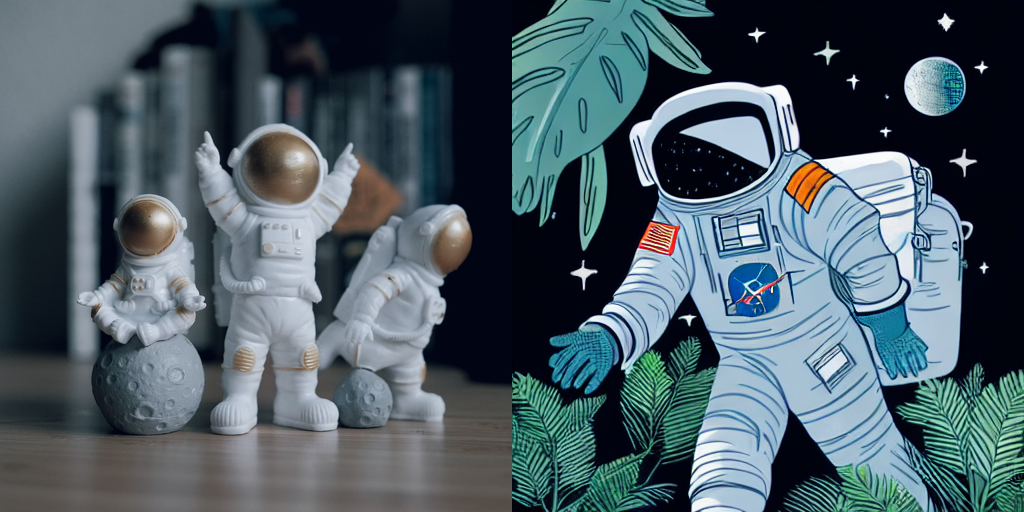

In [3]:
import torch
from diffusers import AutoPipelineForImage2Image
from diffusers.utils import make_image_grid, load_image

# Load the model explicitly on CPU
pipeline = AutoPipelineForImage2Image.from_pretrained(
    "stable-diffusion-v1-5/stable-diffusion-v1-5", torch_dtype=torch.float32, use_safetensors=True
)
pipeline.to("cpu")


url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/img2img-init.png"
init_image = load_image(url)

prompt = "Astronaut in a jungle, cold color palette, muted colors, detailed, 8k"

image = pipeline(prompt, image=init_image).images[0]
make_image_grid([init_image, image], rows=1, cols=2)


In [ ]:
!pip install torch torchvision torchaudio diffusers transformers datasets
from datasets import load_dataset

ds = load_dataset("osunlp/MagicBrush")

In [30]:
from PIL import Image
from transformers import CLIPProcessor
import torch

processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

def process_image(data):
    source_img = Image.open(data['source_img'])
    target_img = Image.open(data['target_img'])

    # Resize or apply any other transformations if necessary
    source_img = source_img.resize((512, 512))
    target_img = target_img.resize((512, 512))

    # Convert to tensor format
    source_img = processor(images=source_img, return_tensors="pt")["pixel_values"]
    target_img = processor(images=target_img, return_tensors="pt")["pixel_values"]

    return source_img, target_img


In [31]:
from diffusers import AutoPipelineForImage2Image
import torch

pipeline = AutoPipelineForImage2Image.from_pretrained(
    "stable-diffusion-v1-5/stable-diffusion-v1-5",
    torch_dtype=torch.float32,  # For CPU use
    use_safetensors=True  # For memory efficiency (using safetensors)
)

pipeline.to("cpu")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusionImg2ImgPipeline {
  "_class_name": "StableDiffusionImg2ImgPipeline",
  "_diffusers_version": "0.31.0",
  "_name_or_path": "stable-diffusion-v1-5/stable-diffusion-v1-5",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [32]:
from PIL import Image

def process_image(data):
    """
    Process the images (source_img and target_img) from the dataset
    into a format compatible with the pipeline.
    """
    # Check if source_img and target_img are file paths or already loaded images
    source_img = data['source_img']
    target_img = data['target_img']

    # If the data contains file paths, open them
    if isinstance(source_img, str):
        source_img = Image.open(source_img).convert("RGB")
    if isinstance(target_img, str):
        target_img = Image.open(target_img).convert("RGB")

    # Resize to 512x512
    source_img = source_img.resize((512, 512))
    target_img = target_img.resize((512, 512))

    # Convert images to tensor format using the processor
    source_img = processor(images=source_img, return_tensors="pt")["pixel_values"]
    target_img = processor(images=target_img, return_tensors="pt")["pixel_values"]

    return source_img, target_img

# Testing the process_image function
sample_data = ds['train'][0]
source_img, target_img = process_image(sample_data)
print(f"Source image shape: {source_img.shape}, Target image shape: {target_img.shape}")



Source image shape: torch.Size([1, 3, 224, 224]), Target image shape: torch.Size([1, 3, 224, 224])


In [18]:
sample_data = ds['train'][0]
print(sample_data)  # Check the actual data


{'img_id': '327726', 'turn_index': 1, 'source_img': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=500x500 at 0x7F7D5B0A18D0>, 'mask_img': <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1024x1024 at 0x7F7D5B0A3580>, 'instruction': 'change the table for a dog', 'target_img': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1024x1024 at 0x7F7D5B0A32E0>}


In [19]:
from PIL import Image
from transformers import CLIPProcessor

# CLIP processor for image-to-tensor conversion
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

class ImageDataset(Dataset):
    def __init__(self, dataset):
        self.dataset = dataset

    def __getitem__(self, idx):
        data = self.dataset[idx]
        source_img, target_img = self.process_image(data)
        return source_img.squeeze(0), target_img.squeeze(0)  # Remove extra batch dimension

    def __len__(self):
        return len(self.dataset)

    def process_image(self, data):
        """
        Process the images (source_img and target_img) from the dataset
        into a format compatible with the pipeline.
        """
        source_img = data['source_img']
        target_img = data['target_img']

        # Resize to 512x512
        source_img = source_img.resize((512, 512))
        target_img = target_img.resize((512, 512))

        # Convert images to tensor format using the processor
        source_img = processor(images=source_img, return_tensors="pt")["pixel_values"]
        target_img = processor(images=target_img, return_tensors="pt")["pixel_values"]

        return source_img, target_img

# Testing the process_image function
sample_data = ds['train'][0]
source_img, target_img = process_image(sample_data)
print(f"Source image shape: {source_img.shape}, Target image shape: {target_img.shape}")


Source image shape: torch.Size([1, 3, 224, 224]), Target image shape: torch.Size([1, 3, 224, 224])


In [20]:
print(f"Source image shape: {source_img.shape}, Target image shape: {target_img.shape}")


Source image shape: torch.Size([1, 3, 224, 224]), Target image shape: torch.Size([1, 3, 224, 224])


In [33]:
from PIL import Image
from torchvision import transforms

# Define the transform to resize the images to 512x512 and convert to tensor
transform = transforms.Compose([
    transforms.Resize((512, 512)),  # Resize image to 512x512
    transforms.ToTensor(),          # Convert image to tensor (normalized to [0, 1])
])

def process_image(data):
    """
    Process the images (source_img and target_img) from the dataset
    into a format compatible with the pipeline.
    """
    source_img = data['source_img']
    target_img = data['target_img']

    # Resize to 512x512 and convert to tensor using the defined transform
    source_img = transform(source_img)
    target_img = transform(target_img)

    return source_img, target_img

# Testing the process_image function
sample_data = ds['train'][0]
source_img, target_img = process_image(sample_data)
print(f"Source image shape: {source_img.shape}, Target image shape: {target_img.shape}")


Source image shape: torch.Size([3, 512, 512]), Target image shape: torch.Size([3, 512, 512])


from here again


In [ ]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
from datasets import load_dataset
from transformers import AutoProcessor
import torch

# Load the MagicBrush dataset
dataset = ds

# Define the transformation (resize to 512x512 and convert to tensor)
transform = transforms.Compose([
    transforms.Resize((512, 512)),  # Resize images to 512x512
    transforms.ToTensor(),          # Convert image to tensor (normalized to [0, 1])
])

class MagicBrushDataset(Dataset):
    def __init__(self, dataset, transform=None):
        self.dataset = dataset
        self.transform = transform

    def __len__(self):
        return len(self.dataset['train'])  # Use the train split

    def __getitem__(self, idx):
        data = self.dataset['train'][idx]

        # Load images
        source_img = data['source_img']
        target_img = data['target_img']

        # Apply transformations
        if self.transform:
            source_img = self.transform(source_img)
            target_img = self.transform(target_img)

        return source_img, target_img

# Create DataLoader for batch processing
train_dataset = MagicBrushDataset(dataset, transform=transform)
train_dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True)

# Initialize the Stable Diffusion Img2Img pipeline (assuming you already have it loaded)
from diffusers import AutoPipelineForImage2Image

pipeline = AutoPipelineForImage2Image.from_pretrained(
    "stable-diffusion-v1-5/stable-diffusion-v1-5",
    torch_dtype=torch.float32,
    use_safetensors=True
)

pipeline.to("cpu")  # Ensure the model is on the CPU

# Access model components
unet = pipeline.unet
vae = pipeline.vae
text_encoder = pipeline.text_encoder

# Set the model components to training mode
unet.train()
vae.train()
text_encoder.train()

# Now you can extract the parameters from these components
parameters = list(unet.parameters()) + list(vae.parameters()) + list(text_encoder.parameters())

# Set up optimizer
optimizer = torch.optim.AdamW(parameters, lr=1e-5)

# Training loop
# Training loop
for epoch in range(3):
    for step, (source_img, target_img) in enumerate(train_dataloader):
        optimizer.zero_grad()  # Clear previous gradients

        # Convert images to the correct format (tensor)
        source_img = source_img  # No need to move to device if using CPU
        target_img = target_img  # No need to move to device if using CPU

        # You need to provide a prompt; use a simple placeholder
        prompt = ["a photo"] * source_img.size(0)  # Batch of prompts (you can replace with more meaningful ones)

        # Forward pass (image generation process)
        output = pipeline(prompt=prompt, image=source_img, target_image=target_img, strength=0.75)  # Adjust `strength`
        generated_image = output["sample"]
        # Calculate loss
        loss = criterion(generated_image, target_img)

        # Backpropagate gradients
        loss.backward()
        optimizer.step()  # Update model weights

        if step % 100 == 0:
            print(f"Epoch {epoch}, Step {step}, Loss: {loss.item()}")

In [ ]:
for epoch in range(3):
    for step, (source_img, target_img) in enumerate(train_dataloader):
        optimizer.zero_grad()  # Clear previous gradients

        # Convert images to the correct format (tensor)
        source_img = source_img  # No need to move to device if using CPU
        target_img = target_img  # No need to move to device if using CPU

        # You need to provide a prompt; use a simple placeholder
        prompt = ["a photo"] * source_img.size(0)  # Batch of prompts (you can replace with more meaningful ones)

        # Forward pass (image generation process)
        output = pipeline(prompt=prompt, image=source_img, target_image=target_img, strength=0.75)  # Adjust `strength`

        # Calculate loss
         # Backpropagate gradients
        optimizer.step()  # Update model weights

        if step % 100 == 0:
            print(f"Epoch {epoch}, Step {step}, Loss: {loss.item()}")

In [53]:
from PIL import Image
import torch
from torchvision import transforms
from diffusers import AutoPipelineForImage2Image

# Define the transformation (same as used during training)
transform = transforms.Compose([
    transforms.Resize((512, 512)),  # Resize images to 512x512
    transforms.ToTensor(),          # Convert image to tensor (normalized to [0, 1])
])

# Load an input image for testing
input_image = Image.open("/content/s.jpg")
input_image = transform(input_image).unsqueeze(0)  # Apply transformation and add batch dimension

# Define a prompt for the image generation
prompt = "change the table for a dog"  # Replace with your desired prompt

# Generate the image using the fine-tuned model
output = pipeline(prompt=prompt, image=input_image, strength=0.75)  # Adjust `strength` if necessary

generated_image = output.images[0]

# Save the generated image
generated_image.save("generated_output_image.jpg")

# Display the generated image
generated_image.show()


  0%|          | 0/37 [00:00<?, ?it/s]

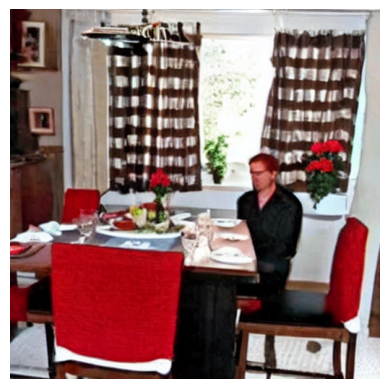

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Convert PIL image to numpy array for matplotlib
generated_image_np = np.array(generated_image)

# Display using matplotlib
plt.imshow(generated_image_np)
plt.axis('off')  # Hide axes
plt.show()


In [52]:
# Extract the generated image from the output
generated_image = output.images[0]

# Save the generated image
generated_image.save("generated_output_image.jpg")

# Display the generated image
generated_image.show()


In [11]:
import torch
from torch.utils.data import Dataset
from PIL import Image
from transformers import CLIPProcessor

# CLIP processor for image-to-tensor conversion
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

class ImageDataset(Dataset):
    def __init__(self, dataset):
        self.dataset = dataset

    def __getitem__(self, idx):
        data = self.dataset[idx]
        source_img, target_img = self.process_image(data)
        return source_img.squeeze(0), target_img.squeeze(0)  # Remove extra batch dimension

    def __len__(self):
        return len(self.dataset)

    def process_image(self, data):
        """
        Process the images (source_img and target_img) from the dataset
        into a format compatible with the pipeline.
        """
        # Load images
        source_img = Image.open(data['source_img'])
        target_img = Image.open(data['target_img'])

        # Resize to 512x512
        source_img = source_img.resize((512, 512))
        target_img = target_img.resize((512, 512))

        # Convert images to tensor format
        source_img = processor(images=source_img, return_tensors="pt")["pixel_values"]
        target_img = processor(images=target_img, return_tensors="pt")["pixel_values"]

        return source_img, target_img


In [14]:
from PIL import Image
from transformers import CLIPProcessor

# CLIP processor for image-to-tensor conversion
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

class ImageDataset(Dataset):
    def __init__(self, dataset):
        self.dataset = dataset

    def __getitem__(self, idx):
        data = self.dataset[idx]
        source_img, target_img = self.process_image(data)
        return source_img.squeeze(0), target_img.squeeze(0)  # Remove extra batch dimension

    def __len__(self):
        return len(self.dataset)

    def process_image(self, data):
        """
        Process the images (source_img and target_img) from the dataset
        into a format compatible with the pipeline.
        """
        # Load images by reading the file paths
        source_img_path = data['source_img']
        target_img_path = data['target_img']

        # Open images from file paths
        source_img = Image.open(source_img_path).convert("RGB")  # Ensure it is in RGB mode
        target_img = Image.open(target_img_path).convert("RGB")  # Ensure it is in RGB mode

        # Resize to 512x512
        source_img = source_img.resize((512, 512))
        target_img = target_img.resize((512, 512))

        # Convert images to tensor format
        source_img = processor(images=source_img, return_tensors="pt")["pixel_values"]
        target_img = processor(images=target_img, return_tensors="pt")["pixel_values"]

        return source_img, target_img

